### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
geo_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/geo_df.csv')
geo_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,Friday,Friday,18,18,August,6.63,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,Friday,Friday,1,1,August,9.52,POINT (-74.02778059244156 40.73698221818716),549.0,7030,7030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,Sunday,Sunday,13,13,August,10.13,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,Thursday,Thursday,22,22,August,19.32,POINT (-74.02778059244156 40.73698221818716),549.0,7030,7307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,Monday,Monday,14,14,August,13.38,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7306


#### Splitting DataFrame into Weekdays an Weekends by using Filter

In [3]:
# Filter out weekdays vs weekends
list1 = ['Monday','Tuesday','Wednesday','Thursday','Friday']
list2 = ['Saturday','Sunday']
weekdays = geo_df[geo_df['startweekday'].isin(list1)]
weekends = geo_df[geo_df['startweekday'].isin(list2)]

In [4]:
trips_week = weekdays.groupby('starttime', as_index = False)[['started_at']].count()
trips_week.columns = ['hour','count']
trips_week['avg_week'] = np.round(trips_week['count']/5 ,0)
trips_week

,hour,count,avg_week
0,0,5395,1079.0
1,1,2677,535.0
2,2,1396,279.0
3,3,873,175.0
4,4,1989,398.0
5,5,7405,1481.0
6,6,22451,4490.0
7,7,41909,8382.0
8,8,54039,10808.0
9,9,29208,5842.0


In [5]:
trips_weekend = weekends.groupby('starttime', as_index = False)[['started_at']].count()
trips_weekend.columns = ['hour','count']
trips_weekend['avg_weekend'] = np.round(trips_weekend['count']/2 ,0)
trips_weekend

,hour,count,avg_weekend
0,0,6051,3026.0
1,1,4620,2310.0
2,2,2985,1492.0
3,3,1578,789.0
4,4,779,390.0
5,5,1066,533.0
6,6,1884,942.0
7,7,3696,1848.0
8,8,7232,3616.0
9,9,12046,6023.0


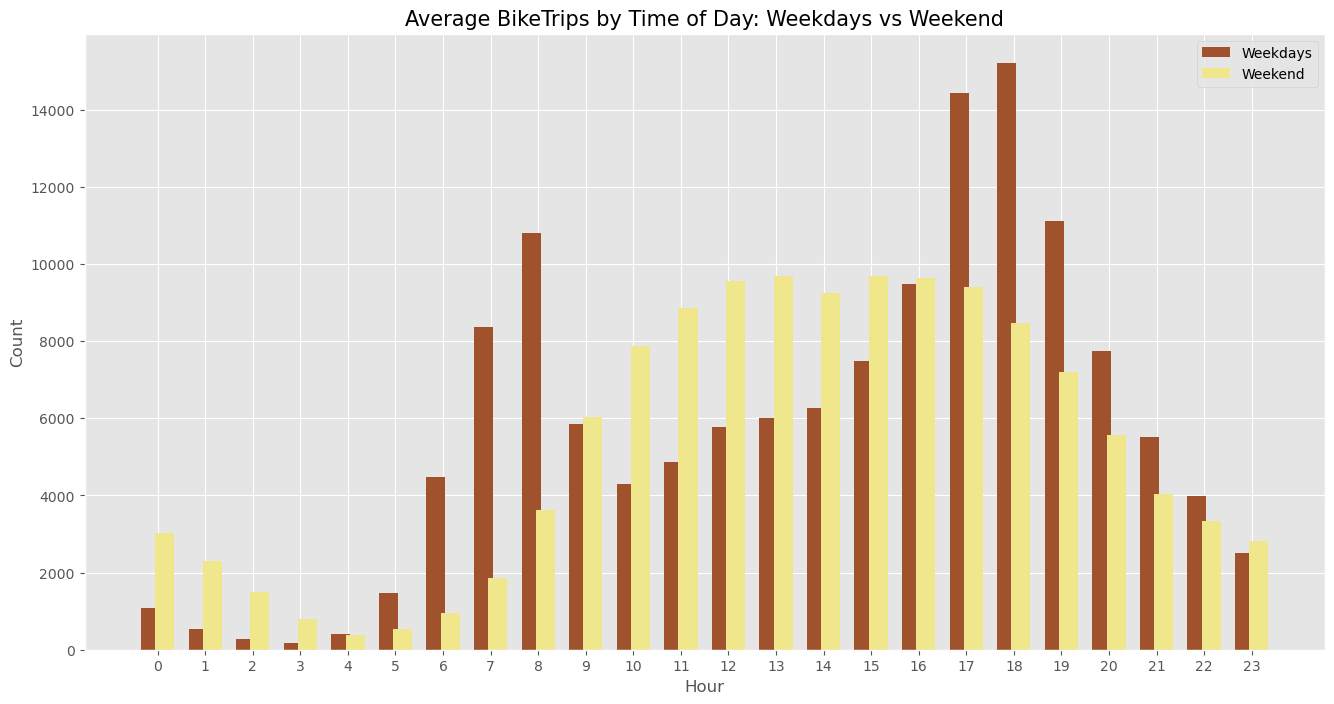

In [6]:
# bar plot of trips on weekdays vs. weekends by time of day
fig = plt.subplots(figsize=(16,8))

x = np.arange(24)
plt.bar(x-.15, trips_week['avg_week'], width = 0.4, color = 'sienna')
plt.bar(x+.15, trips_weekend['avg_weekend'], width = 0.4, color = 'khaki')

plt.xticks(x)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(["Weekdays", "Weekend"])

plt.title('Average BikeTrips by Time of Day: Weekdays vs Weekend', fontsize = 15)

plt.show()
